In [1]:
x=1

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import pandas as pd
from matplotlib import pyplot as plt
import os

random.seed(123)

In [3]:
rootdir = '/lustre/groups/ml01/workspace/anastasia.litinetskaya/experiments/integration/trimodal/not_marginal_mmd/'

In [4]:
results = {}

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith("metrics.csv"):
            n_features = subdir.split('/')[-1].split('-')[0]
            name = filepath.split('/')[-1][:-12]
            df = pd.read_csv(filepath)
            df = df.set_index('Unnamed: 0')
            if name not in results:
                results[name] = {}
            results[name][n_features] = df['0']['overall']

In [5]:
df = pd.DataFrame(results)
df = df.sort_index()
df

,reference_CITE-seq_query,reference_snRNA-seq_query,train,reference_ATAC-seq_query,reference_query,reference_scRNA-seq_query,reference_multiome_query
marginal,0.747717,0.743667,0.759303,0.747575,0.753552,0.759151,0.751158
not_marginal_mmd3,0.752707,0.716481,0.763617,0.656811,0.706823,0.715818,0.763041


In [6]:
df = df[['train', 
         'reference_CITE-seq_query', 
         'reference_multiome_query', 
         'reference_scRNA-seq_query', 
         'reference_ATAC-seq_query',
         'reference_snRNA-seq_query']]

In [7]:
df = df.rename(columns={
    'reference_CITE-seq_query': 'CITE-seq mapping', 
    'reference_snRNA-seq_query': 'snRNA-seq mapping', 
    'train': 'reference building',
    'reference_ATAC-seq_query': 'ATAC-seq mapping', 
    'reference_scRNA-seq_query': 'scRNA-seq mapping', 
    'reference_multiome_query': 'multiome mapping'
})

In [8]:
df = df.rename(index={
    'marginal': 'marginal MMD',
    'not_marginal_mmd3': 'not marginal MMD'
})

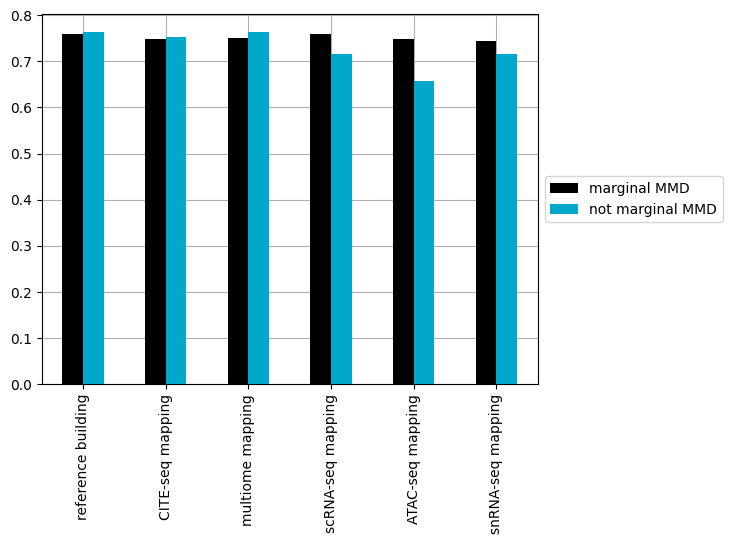

In [9]:
ax = df.T.plot(kind='bar', rot=90, zorder=3, color=["black", "#00a8cc"])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.grid(zorder=0)
plt.savefig('figures/robustness_mmd.svg', bbox_inches='tight')